# PHYS 309 Assignment 1

### Getting started

<ul>
    <li>If you do not already have the <a href="https://www.anaconda.com/products/distribution">Anaconda <tt>python</tt> distribution</a>, click the link to install the individual, free version</li>
    <li>Download this notebook to your own computer, open with <tt>Jupyter</tt> notebook or lab, and complete the missing code. See the <a href="https://docs.jupyter.org/en/latest/start/index.html"><tt>Jupyter</tt> documentation</a> for help.</li>
</ul>

<strong>Instead of putting in the values of physical constants such as $c$ and $\epsilon_0$ by hand, use SI values pre-programmed into [scipy.constants](https://docs.scipy.org/doc/scipy/reference/constants.html). 
For example, $\mu_0$ is <tt>constants.mu_0</tt>. 

### Set up <tt>python</tt> environment

In [35]:
import numpy as np
import matplotlib.pyplot as plt

 # Contains physical constants defined in SI units (default) as well as other systems
from scipy import constants

# Make easily readable plots with large axis labels
plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", 
                     "font.sans-serif":"Arial"})

### Questions


Recall that the speed of light in vacuum is 
\begin{equation}
c = \frac{1}{\sqrt{\epsilon_0 \mu_0}}, \; \; \; \; \; (1)
\end{equation}
where $\epsilon_0 = 8.85 \times 10^{-12}$ F/m (Farads per meter)$^{*}$ is the electric permittivity of free space and $\mu_0 = 1.26 \times 10^{-6}$ N/A$^2$ (Newtons per Ampere$^2$)$^{**}$ is the magnetic permeability of free space. The electric field created by a point charge $q$ is
\begin{equation}
E = \frac{1}{4 \pi \epsilon_0} \frac{q}{r^2}. \; \; \; \; (2)
\end{equation}
Suppose a charged particle is moving at some fraction of the speed of light in vacuum ($v_q = f c; \; 0 < f < 1$) as seen in reference frame $S$. Reference frame $S^{\prime}$ is co-moving with the point charge, so that $\frac{dx^{\prime}}{dt^{\prime}} = v^{\prime}_q = 0$ in frame $S^{\prime}$. To make the math easier, put $q$ at the origin of $S^{\prime}$.

To understand Einstein's motivation for developing the special theory of relativity, make the <strong>incorrect, erroneous, and wrong</strong> assumption that the Galilean velocity transformation holds true for all values of $f$:
\begin{equation}
\frac{dx^{\prime}}{dt^{\prime}} = \frac{dx}{dt} - v_q \; \; \; (3)
\end{equation}

<ol>
    <li>Assume the charged particle is an electron. Using Equation 2, calculate and plot the electric field as a function of distance $r^{\prime}$ from $q$ in frame $S^{\prime}$. Choose an x-axis range that makes sense to you and label both axes with correct units.</li>
</ol>

Text(0, 0.5, 'Electric Field (N/C)')

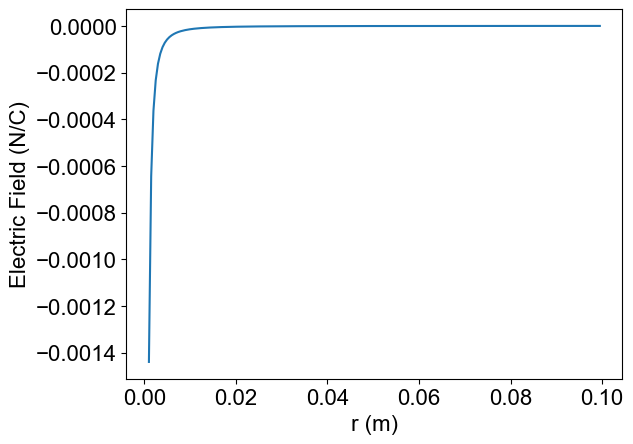

In [36]:
# 1/4pi*epselon is the constant k
k=1/(4* np.pi *constants.epsilon_0)

# function that returns electric field
def electric_field(q,r):
    return (k*q)/(r**2)

# Range for values of distance
radius = np.linspace(0.001,0.1, num=200, endpoint = False)

# Plot electric field as a functiion of distance r' from q in fram S'
plt.plot(radius, electric_field(-constants.e,radius))
plt.xlabel('r (m)')
plt.ylabel('Electric Field (N/C)')

<ol start=2>
    <li>The Galilean velocity transformation suggests that objects can "catch up" with light, so that light in a vacuum appears to be going slower than the value of $c$ from Equation (1). Make a plot of $c^{\prime}$, the <strong>incorrect</strong> speed of light in frame $S^{\prime}$ according to the Galilean transformation, as a function of $f$. Put units on the axes where appropriate.</li>
</ol>

Text(0, 0.5, '$c^{\\prime}$ (m/s)')

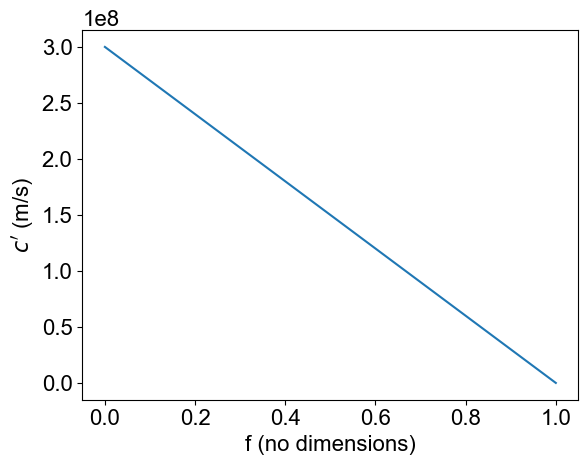

In [37]:
# Incorrect Speed of light
def c_prime(f):
    return constants.c * (1-f)

# Range for function f
f = np.linspace(0,1,num=100,endpoint=True)

# Plot of 𝑐′, the incorrect speed of light in frame 𝑆′ according to the Galilean transformation, as a function of  𝑓.
plt.plot(f,c_prime(f))
plt.xlabel("f (no dimensions)")
plt.ylabel(r"$c^{\prime}$ (m/s)")

<ol start=3>
    <li>In frame $S^{\prime}$, something has to give: either Equation (1) is no longer true, or the values of $\epsilon_0$ and/or $\mu_0$ have to change. Suppose Equation (1) is still true and $\mu_0 = \mu_0^{\prime}$. Make a plot with two vertically stacked subplots. The top subplot should show $\epsilon_0^{\prime}$ as a function of $f$, while the bottom plot should show the electric field $E^{\prime} = \frac{1}{4 \pi \epsilon_0^{\prime}} \frac{q}{{r^{\prime}}^2}$ at $r^{\prime} = 1 \mu \mathrm{m} = 10^{-6}$ m as a function of $f$. Put units on the axes where appropriate.</li>
</ol>

C:\Users\matve\AppData\Local\Temp\ipykernel_11772\821824848.py:3: RuntimeWarning: divide by zero encountered in divide
  return 1 / ((c_prime**2) * constants.mu_0)


Text(0.5, 0, 'f(dimentionless)')

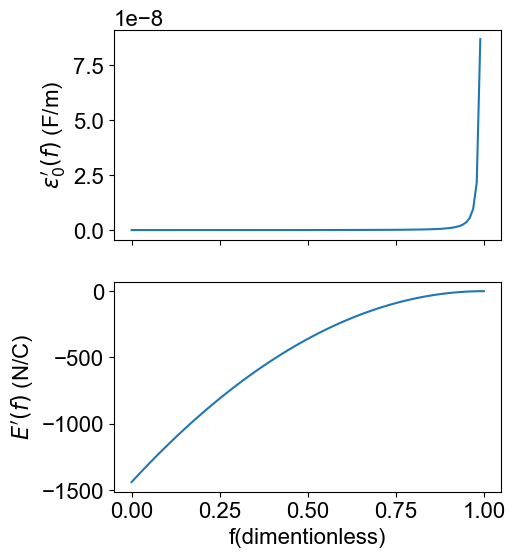

In [38]:
# Define epsilon 0 prime
def eps_0_prime(c_prime):
    return 1 / ((c_prime**2) * constants.mu_0)

# Range of values for epsilon 0 prime
epsilon_0_prime = eps_0_prime(c_prime(f))

# Range of values for electric field prime with r' = 10 microns
micron = 1e-6
electric_field_prime = -constants.e / (4 * np.pi * epsilon_0_prime * micron**2)

# Make the graphs of epsilon 0 prime and electric field prime share the x-axis
fig, (ax1, ax2) = plt.subplots(2,1,sharex=True, figsize=(5,6))

# Plot of epsilon 0 prime
ax1.plot(f, epsilon_0_prime)
ax1.set_ylabel("$\epsilon_0^{\prime}(f)$ (F/m)")

# Plot of electric field prime
ax2.plot(f,electric_field_prime)
ax2.set_ylabel("$E^{\prime}(f)$ (N/C)")
ax2.set_xlabel("f(dimentionless)")


<ol start=4>
    <li>Now assume $f = 0.5$. In the same plot window, plot $E^{\prime}(r^{\prime})$ given by Equation 2 (same curve as in Problem 1) <em>and</em> $E^{\prime}(r^{\prime})$ calculated as in Problem 3, where $\epsilon_0^{\prime}$ is a function of $f$. Do you notice a problem?</li>
</ol>

(-0.0002, 1e-05)

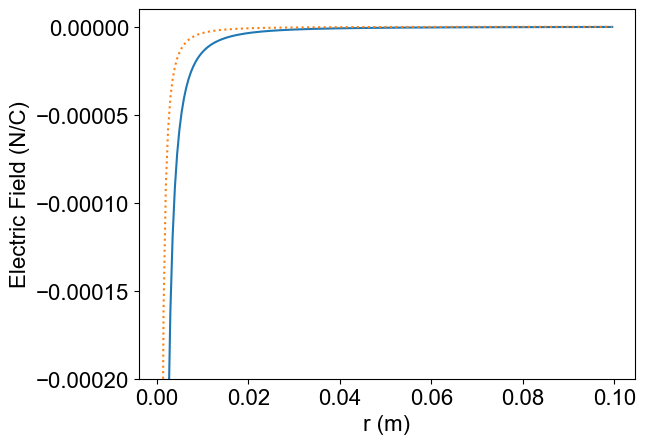

In [39]:
# Value for epsilon 0 prime when f=0.5
epsilon_0_f05 = eps_0_prime(c_prime(0.5))

# Range of E' values for epsilon 0 prime
elfield_f05 = -constants.e / (4 * np.pi * epsilon_0_f05 * radius**2)

# Plot from question 1 
plt.plot(radius, electric_field(-constants.e,radius), label = r"$E^{\prime} = \frac{q}{4 \pi \epsilon_0 r^{\prime 2}}$")
plt.plot(radius, elfield_f05, linestyle = 'dotted', label = r"$E^{\prime} = \frac{q}{4 \pi \epsilon_0^{\prime} r^{\prime 2}}$")
plt.xlabel('r (m)')
plt.ylabel('Electric Field (N/C)')
plt.ylim([-0.0002,0.00001])

# For the plots, tbe curves don't fully match. It could mean that Electro-magnetism breaks down once we use Galilean transformations.
# Orange dash means electric field at f=0.5

<ol start=5>
    <li>To resolve the issues revealed by the plot from Problem 4, you may suggest setting $\epsilon_0^{\prime} = \epsilon_0$ and allowing $\mu_0^{\prime}$ to vary with $f$. Let's explore that solution. To accompany the point charge in problems 1-4, add a current loop that's also at rest in frame $S^{\prime}$. Recall that the magnitude of the magnetic field strength at the center of the loop in frame $S$ is $B = \frac{\mu_0 I}{2R}$, where $I$ is the current and $R$ is the radius of the loop. Suppose $I = 1$ A and $R = 1$ m. Assume $E^{\prime} = E$, $B^{\prime} = B$, and $c^{\prime}$ depends on $f$ as in problem 2. Plot $\mu_0$ as a function of $f$.</li>
</ol>

C:\Users\matve\AppData\Local\Temp\ipykernel_11772\2698702189.py:5: RuntimeWarning: divide by zero encountered in divide
  mu_0_prime = 1 / (constants.epsilon_0 * c_prime(f)**2)


Text(0, 0.5, '$\\mu_0^{\\prime}$ (N/A$^2$)')

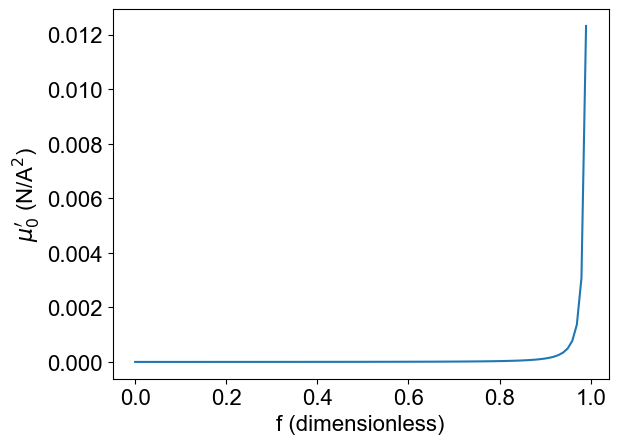

In [40]:
# Mu 0 prime formula in terms of epselon 0 and c prime. 
# Result of calculation: mu_0' = 1 / (epsilon_0 c'^2). 
# E' = E so epsilon_0' = epsilon_0

mu_0_prime = 1 / (constants.epsilon_0 * c_prime(f)**2)

# Mu 0 prime as a function of f
plt.plot(f, mu_0_prime)
plt.xlabel("f (dimensionless)")
plt.ylabel("$\mu_0^{\prime}$ (N/A$^2$)")

<ol start=6>
<li>If we calculate $c^{\prime}$ using the Galilean transformation in Equation 3, is there any value of $f$ for which $E^{\prime} = E$ <strong>and</strong> $B^{\prime} = B$? Make a graph to illustrate your answer.</li>
</ol>

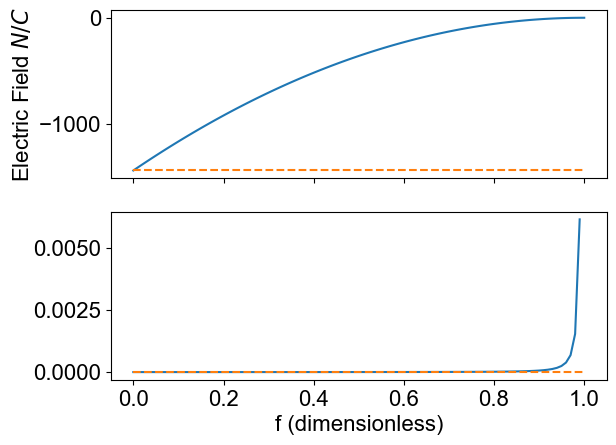

In [41]:
# From problem 5, we know 𝐼 = 1A and 𝑅 = 1m, so actual B = mu_0 / 2 only
# For magnetic_field_prime is depends on mu_0 prime

electric_field_actual = -constants.e / (4 * np.pi * constants.epsilon_0 * micron**2)
magnetic_field_actual = constants.mu_0 / 2 
magnetic_field_prime = mu_0_prime / 2 

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# Graph of electric fields compared. Blue line - electric field prime, Dashed line - electric field actual
ax1.plot(f, electric_field_prime)
ax1.set_ylabel("Electric Field $N/C$")
ax1.plot(f, electric_field_actual*np.ones(len(f)), ls='--')

# Graph of magnetic fields compared. Blue line - magnetic field prime, Dashed line - magnetic field actual
ax2.plot(f, magnetic_field_prime)
ax2.set_xlabel("f (dimensionless)")
ax2.plot(f, magnetic_field_actual*np.ones(len(f)), ls='--')

# E'= E and B'= B only when f=0

Conceptual questions about the conflict between the Galilean velocity transformation and E&M are in the written homework assignment.

$^{*}$Farad = Coulomb/Volt: Farad is the unit of capacitance, which measures the amount of charge necessary to increase the electric potential of a system by 1 Volt. Farads/meter measure how much capacitance you get per meter of free space between yourself and a charged particle.

$^{**}$Newtons/Ampere$^2$ = Newtons/(Coulombs/second)$^2$. $\mu_0$ measures how effective inductance is at creating magnetic force in free space.